In [1]:
!ls

0. Main program.txt                    2.A Data Understanding_EDA.py
0. Source code_Walkthrough.ipynb       2.A Data_Understanding_EDA_1.0.ipynb
1. Data_Preparation_V1a_to debug.ipynb 2.A.1 Dual dashboard.py
1. Data_Preparation_V1b_to debug.ipynb SIR_modeling_2022_exercise.ipynb
1.A Data_Preparation.py                reference help
1.B Data_Preparation.py


In [2]:
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Preparation

* focus is always to understand the final data structure
* support each step by visual analytics

## Data reference
### Johns Hopkins GITHUB csv data

https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
|-> Infections

### Centers for Civic Impact

https://github.com/govex/COVID-19/blob/a96dbc70eada30e83b1c475a328bb3cab4712741/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv |-> Vaccinned

## Figure1: The relative cases overtime of Covid infectors (absolute Covid cases/population size) 


##### Note: the code is also content in the file '1.A Data_Preparation.py'

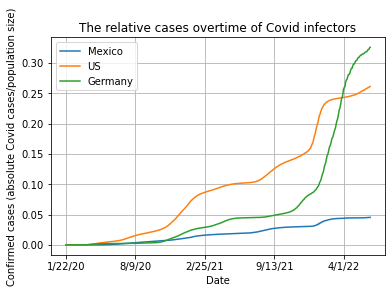

In [7]:
data_path = 'https://github.com/CSSEGISandData/COVID-19/blob/246eab67395dce9a4238fff77aa5f3561e253d48/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv?raw=true'
## added ?raw=true to get last value and get the permantlink from Github

#data_path1 = 'https://github.com/govex/COVID-19/blob/a96dbc70eada30e83b1c475a328bb3cab4712741/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv?raw=true'
## added ?raw=true to get last value and get the permantlink from Github


# data infections 
pd_raw_inf=pd.read_csv(data_path,)
pd_raw_inf.to_csv('../data/raw/COVID_infections_raw.csv',sep=';');

'''
Data for infections COVID¶
'''

# define time index
time_idx=pd_raw_inf.columns[4:]

df_plot= pd.DataFrame({'date':time_idx})

# define countries
country_list=['Mexico',
              'US',
              'Germany',
             ] 

for each in country_list:
    df_plot[each] = np.array(pd_raw_inf[pd_raw_inf['Country/Region']==each].iloc[:,4::].sum(axis=0))

# Total population for each country: 
    # Mexico US Germany
pop = [128.9E6, 329.5E6, 83.24E6]

'''df_plot.set_index('date').div(pop).plot( title = 'The relative cases overtime of Covid infectors', 
                                        grid= True,   
                                        xlabel = 'Date',
                                        ylabel = 'The relative cases overtime of Covid infectors' ,                                                                            
                                                                             
                                        )
'''

'''Figure1: The relative cases overtime of Covid infectors (absolute Covid cases/population size) '''

fig1 =df_plot.set_index('date').div(pop).plot( grid = True,
                                              xlabel = 'Date',
                                              ylabel = 'Confirmed cases (absolute Covid cases/population size)',
                                              title = 'The relative cases overtime of Covid infectors',        
                                              )

''' Save fig in the folder '''

fig1.figure.savefig('/Users/victhorvic/ads_covid-19/reports/figures/figure_1.png', dpi = 1000)
#plt.show

##  Figure2: The vaccination rate over time


##### Note: the code is also content in the file '1.B Data_Preparation.py'

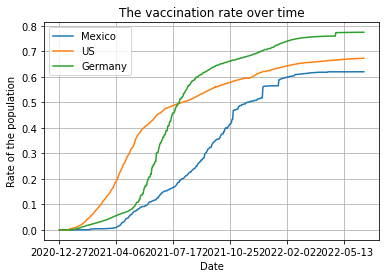

In [9]:
data_path1 = 'https://github.com/govex/COVID-19/blob/a96dbc70eada30e83b1c475a328bb3cab4712741/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv?raw=true'
## added ?raw=true to get last value and get the permantlink from Github

# data vaccined
pd_raw_vac=pd.read_csv(data_path1,)

''' Dates for vaccines COVID'''
# to prepare the index timer 
time_idx=pd_raw_vac['Date'].unique()

df_plot = pd.DataFrame({
    'Date':time_idx})


pd2 = pd_raw_vac.drop(['Report_Date_String','UID','Province_State','People_partially_vaccinated'],axis=1)
''' check data of the countries '''

#Germany data 
testde = pd_raw_vac[pd_raw_vac['Country_Region']=='Germany'].iloc[:,1::].set_index(['Date'])
#testde.dropna(subset=['People_fully_vaccinated']).iloc[:,0:3].plot(title = 'Germany')


#US Data
pd2[pd2['Country_Region']=='US'].iloc[:,1::].set_index('Date')
#pd2[pd2['Country_Region']=='US'].iloc[:,1::].set_index('Date').plot(title = 'US')

# Mexico data
pd2[pd2['Country_Region']=='Mexico'].iloc[:,1::].set_index('Date')
#pd2[pd2['Country_Region']=='Mexico'].iloc[:,1::].set_index('Date').plot(title ='Mexico')

'''Cocatenate data '''

country_list=['Mexico',
              'US',
              'Germany'
             ]

# define the data for concatenate
c_de = testde.dropna(subset=['People_fully_vaccinated']).iloc[:,2:3]

c_mx =pd2[pd2['Country_Region'] == country_list[0]].groupby('Date').sum().drop(['Doses_admin'], axis=1)
                             
c_us =pd2[pd2['Country_Region'] == country_list[1]].iloc[:,1::].groupby('Date').sum().drop(['Doses_admin'], axis=1)                             

#concac =pd.concat([c_mx,c_us,c_de],axis=1,join="inner")
concac =pd.concat([c_mx,c_us,c_de],axis=1,join="inner", )#keys=['Mexico', 'US', 'Germany'])
concac.columns = country_list

# Total population for each country
        # Mexico US Germany
pop = [128.9E6, 329.5E6, 83.24E6]

# Look for divide the data 
concac[( 'Mexico')] = concac[('Mexico')].div(pop[0])
concac[( 'US')] = concac[('US')].div(pop[1])
concac[( 'Germany')] = concac[('Germany')].div(pop[2])

#concac[( 'Mexico', 'People_fully_vaccinated')] = concac[( 'Mexico', 'People_fully_vaccinated')].div(pop[0])
#concac[( 'US', 'People_fully_vaccinated')] = concac[( 'US', 'People_fully_vaccinated')].div(pop[1])
#concac[( 'Germany', 'People_fully_vaccinated')] = concac[( 'Germany', 'People_fully_vaccinated')].div(pop[2])

''' Figure2: The vaccination rate over time '''


fig2 =concac.plot( grid = True,
                  xlabel = 'Date',
                  ylabel = 'Rate of the population',
                  title = 'The vaccination rate over time',  
                  
                  )

''' Save fig in the folder '''
fig2.figure.savefig('/Users/victhorvic/ads_covid-19/reports/figures/figure_2.png',dpi = 1000)
#plt.show()